# Simulation using Python, Lab 2, Part C
## Simulation of Dynamic Systems

Using [odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) of scipy

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math
import seaborn as sns

**Scenario D1: Let's look at a simple Population dynamics.**

The rate of change of population $P(t)$ of a region is affected by its birth rate and death rate as follows

$\displaystyle \frac{dP}{dt} = Births - Deaths = bP - dP$

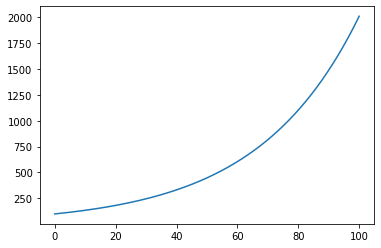

In [2]:
#Inputs
b=0.05
d=0.02

#Initial condition
P0 = 100

#Model
def popModel(P, t, b, d): #First input is Equations/state, Time, then optional input parameters
  dP_dt = b*P - d*P
  return dP_dt

#time line
t = np.linspace(0, 100, 1000)

#simulate
Pop = odeint(popModel, P0, t, args=(b, d) )

#plot
plt.plot(t, Pop)



---



**Scenario D2: SIR Epidemics Model**

A simple mathematical description of the spread of a disease in a population is the so-called SIR model, which divides the (fixed) population of $N$ individuals into three "compartments" which may vary as a function of time, $t$:

* $S(t)$ are those susceptible but not yet infected with the disease;
* $I(t)$ is the number of infectious individuals;
* $R(t)$ are those individuals who have recovered from the disease and now have immunity to it.

The SIR model describes the change in the population of each of these compartments in terms of two parameters, $
\beta$ and $\gamma$. $\beta$ describes the effective contact rate of the disease: an infected individual comes into contact with $\beta N$ other individuals per unit time (of which the fraction that are susceptible to contracting the disease is $S/N$). $\gamma$ is the mean recovery rate: that is, $1/\gamma$ is the mean period of time during which an infected individual can pass it on.

The differential equations describing this model is as follows:

$\displaystyle \frac{dS}{dt}=-\frac{\beta S I}{N}$,

$\displaystyle \frac{dI}{dt}= \frac{\beta S I}{N} - \gamma I$,

$\displaystyle \frac{dR}{dt}=\gamma I$,

Assume parameters $\beta=0.2, 1/\gamma=10$ days in a population of $N=1000$. The model is started with a single infected individual on day 0: $I(0)=1$.

Maximum infected is  153.92120225004712  at time  67


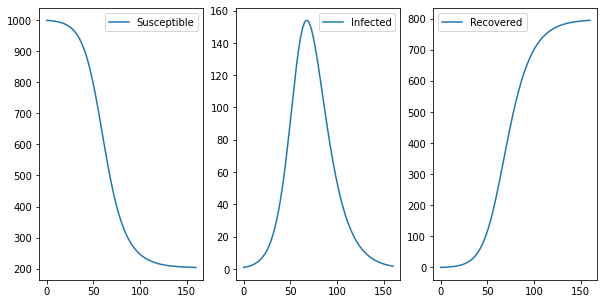

In [61]:
#Inputs
N = 1000 #Total population
beta, gamma = 0.2, 1.0/10
fig, axes=plt.subplots(1,3,figsize=(10,5))
#Initial conditions (initial values of Infected, Recovered and Susceptible population)
I0, R0 = 1, 0
S0 = N - I0 - R0
# Initial conditions vector
y0 = S0, I0, R0

# The SIR model differential equations Model.
def SIRmodel(y, t, N, beta, gamma):
  S, I, R = y
  dS_dt = -beta*S*I/N
  dI_dt = beta*S*I/N - gamma*I
  dR_dt = gamma*I
  return dS_dt, dI_dt, dR_dt

#timepoints
t = np.linspace(0, 160, 160)

# Integrate/Simulate the SIR equations over the time grid, t.
eqn = odeint(SIRmodel, y0, t, args=(N, beta, gamma))

S, I, R = eqn.T
print("Maximum infected is ", max(I), " at time ", np.argmax(I))
# Plot the data on three separate curves for S(t), I(t) and R(t)
sns.lineplot(ax=axes[0],x=t,y=S, label='Susceptible')
sns.lineplot(ax=axes[1],x=t,y=I, label='Infected')
sns.lineplot(ax=axes[2],x=t,y=R, label='Recovered');

### To Do


1. Suppose in the SIR model, the value of $\beta$ is not known. Do a sensitivity analysis, by running the above SIR model, with 10 different values of $\beta$ drawn randomly between 0.1 to 0.3. Prepare a comparative graph of Infectivity ($I$) curve. Prepare a table showing the Maximum number infected and the time of peak got for different values of $\beta$

S.No.     value of beta       :            maximum of I     :    time
 1      0.2577442778418244 :              244.90514144134679       46
 2      0.2315386167981883 :              205.92683370054272       54
 3      0.17158570406457338 :              103.12319996378577       87
 4      0.18573634680699203 :              128.77774538420257       76
 5      0.23811703378851254 :              216.08219856843107       52
 6      0.21781376261068802 :              183.9478216797044       59
 7      0.12008909094313064 :              13.204657270067344       159
 8      0.2695235871500496 :              261.427940474299       44
 9      0.1235229090670142 :              18.588121895585743       159
 10      0.27601009049575104 :              270.0404722966475       42


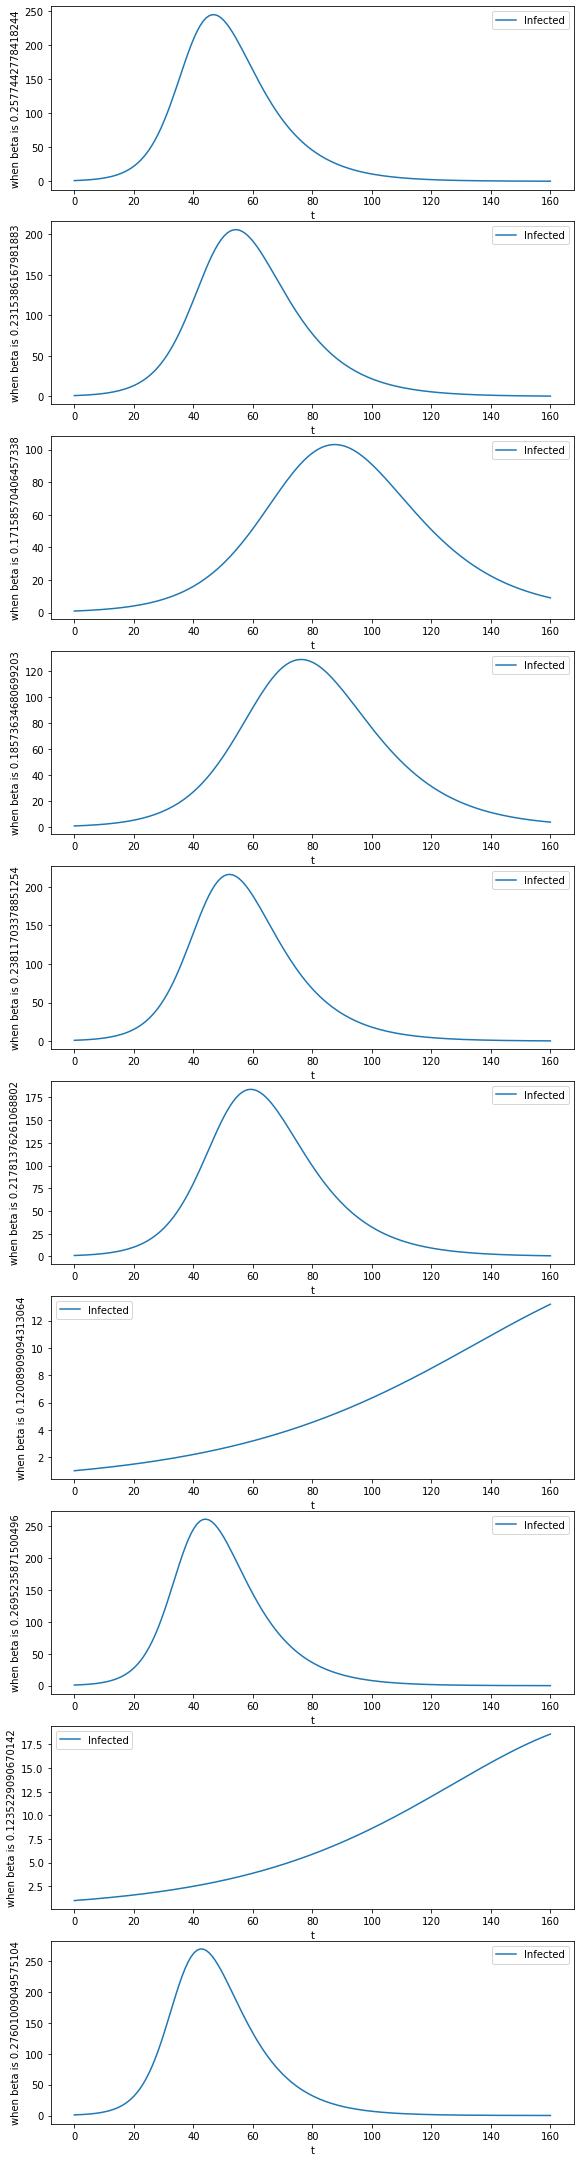

In [80]:
#Inputs
fig, axes=plt.subplots(10,1,figsize=(8,30))
fig.tight_layout()
print(f"S.No.     value of beta       :            maximum of I     :    time")
for i in range(10):
  N = 1000 #Total population
  beta, gamma = np.random.uniform(0.1,0.3), 1.0/10

#Initial conditions (initial values of Infected, Recovered and Susceptible population)
  I0, R0 = 1, 0
  S0 = N - I0 - R0
# Initial conditions vector
  y0 = S0, I0, R0

# The SIR model differential equations Model.
  def SIRmodel(y, t, N, beta, gamma):
    S, I, R = y
    dS_dt = -beta*S*I/N
    dI_dt = beta*S*I/N - gamma*I
    dR_dt = gamma*I
    return dS_dt, dI_dt, dR_dt

#timepoints
  t = np.linspace(0, 160, 160)

# Integrate/Simulate the SIR equations over the time grid, t.
  eqn = odeint(SIRmodel, y0, t, args=(N, beta, gamma))

  S, I, R = eqn.T
  print(f' {i+1}      {beta} :              {max(I)}       {np.argmax(I)}')
  b=f'when beta is {beta}'
  fig2=sns.lineplot(ax=axes[i],x=t,y=I, label='Infected')
  fig2.set(xlabel='t',ylabel=b);
  

### Answer:Hence we can see that when value of beta is high that means if effective contact rate is high then the number of infectious individuals is also high. So number of infectious individuals is directly propostional to value of beta(effective contact rate).

2. Suppose in the above SIR model, the recovered people may lose immunity after *k* days on an average, and again become susceptible to the disease. Hence the equations become:

$\displaystyle \frac{dS}{dt}= R/k -\frac{\beta S I}{N}$,

$\displaystyle \frac{dI}{dt}= \frac{\beta S I}{N} - \gamma I$,

$\displaystyle \frac{dR}{dt}=\gamma I - R/k$  

Suppose $k=60$ days. All other parameters are as given earlier. Write the full code and simulate this (SIRS) model.


Maximum infected is  174.3060639704286  at time  70


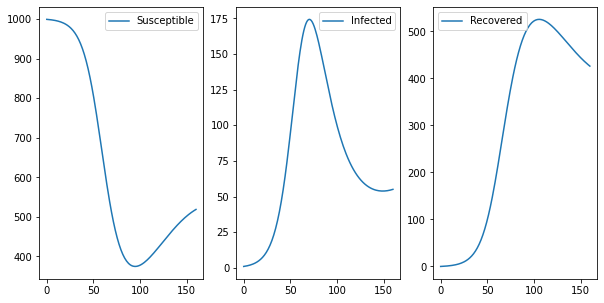

In [81]:
#Inputs
N = 1000 #Total population
beta, gamma = 0.2, 1.0/10
fig, axes=plt.subplots(1,3,figsize=(10,5))
#Initial conditions (initial values of Infected, Recovered and Susceptible population)
I0, R0 = 1, 0
S0 = N - I0 - R0
# Initial conditions vector
y0 = S0, I0, R0

# The SIR model differential equations Model.
def SIRmodel(y, t, N, beta, gamma):
  S, I, R = y
  dS_dt = (R/k)-beta*S*I/N
  dI_dt = beta*S*I/N - gamma*I
  dR_dt = gamma*I-R/k
  return dS_dt, dI_dt, dR_dt

#timepoints
t = np.linspace(0, 160, 160)

# Integrate/Simulate the SIR equations over the time grid, t.
eqn = odeint(SIRmodel, y0, t, args=(N, beta, gamma))

S, I, R = eqn.T
print("Maximum infected is ", max(I), " at time ", np.argmax(I))
# Plot the data on three separate curves for S(t), I(t) and R(t)
sns.lineplot(ax=axes[0],x=t,y=S, label='Susceptible')
sns.lineplot(ax=axes[1],x=t,y=I, label='Infected')
sns.lineplot(ax=axes[2],x=t,y=R, label='Recovered');

### Optional scenarios below

**Scenario D3: Simple Harmonic Motion**

A simple pendulum consists of a ball (point-mass) m hanging from a (massless) string of length L and fixed at a pivot point P. When displaced to an initial angle and released. If the amplitude of angular displacement is small enough, so the small angle approximation ($\sin\theta\approx\theta$) holds true, then the equation of motion reduces to the equation of simple harmonic motion.

$\displaystyle \frac{d^2\theta}{dt^2} = -\frac{g}{L}\theta$

This second order differential equation can be rewritten as a pair of coupled first order differential equations.

$\displaystyle \frac{d\theta}{dt} = v$  and 

 $\displaystyle \frac{dv}{dt}=-\frac{g}{L}\theta$

Let's simulate this

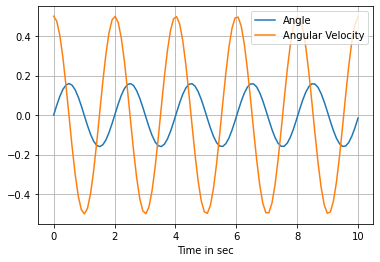

In [ ]:
#Inputs
g=9.81
L=1

#Initial condition
  #we have 2 variables v and theta
Var0 = [0, 0.5]

#Model
def shm(Var, t, g, L):
  theta = Var[0]
  v = Var[1]
  dTheta_dt = v
  dv_dt = -g*theta/L
  return dTheta_dt, dv_dt

#time line
t = np.linspace(0,10, 100)

#simulate
Var = odeint(shm, Var0, t, args=(g, L))

#print(Var)
#plot
plt.plot(t, Var[:,0], label='Angle')
plt.plot(t, Var[:,1], label='Angular Velocity')
plt.legend()
plt.xlabel('Time in sec')
plt.grid()

**Scenario D4: The real non-linear simple pendulum**

When the angular displacement amplitude of the pendulum is large enough that the small angle approximation no longer holds, then the equation of motion must remain in its nonlinear form.

$\displaystyle \frac{d^2\theta}{dt^2} = -\frac{g}{L}\sin\theta$

Let's expand it to inlcude damping also. Thus,

$\displaystyle \frac{d^2\theta}{dt^2} + \frac{b}{m}\frac{d\theta}{dt} +\frac{g}{L}\sin\theta = 0$ 

We will convert it into 2 simultaneous ODEs

$\displaystyle \frac{d\theta}{dt} = v$

$\displaystyle \frac{dv}{dt} = -\frac{b}{m}\frac{d\theta}{dt} -\frac{g}{L}\sin\theta$

Let's simulate this.

**The below cell is partially complete. You need to insert the function**


In [ ]:
#Inputs
g=9.81
L=1
b=0.05
m=1

#Initial condition
Var0=[0,3]  #we have 2 variables v and theta

#COMPLETE THE MODEL AND THEN SIMULATE
def HM(Var, t, g, L, b, m):




#time line
t=np.linspace(0,20,240)

#simulate
Var = odeint(HM, Var0, t, args=(g, L, b, m))

#plot
plt.plot(t, Var[:,0], label='Angle')
plt.plot(t, Var[:,1], label='Angular velocity')
plt.legend()
plt.xlabel('Time (sec)')
plt.grid()

IndentationError: ignored